In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pickle
import obspy
from scipy.signal import find_peaks
import os
import pandas as pd

In [15]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [16]:
number_of_peaks_opt = []
magnitudes_opt = []
number_of_peaks_moy = []
magnitudes_moy = []
names_of_peaks = []

for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):

    db = combined[combined['scardec_name']==scardec_name]

    time_opt = []
    momentrate_opt = []

    time_moy = []
    momentrate_moy = []

    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith('fctopt')]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        time_opt.append(float(split[0]))
        momentrate_opt.append(float(split[1]))

    peaks_opt = find_peaks(momentrate_opt,
                       height = (None, None),
                       threshold = (None, None),
                       prominence = (None, None),
                       width = (None, None))

    starts = [n for n, l in enumerate(event) if l.startswith('fctmoy')]

    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    #print(lines)
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        #print(split)
        time_moy.append(float(split[0]))
        momentrate_moy.append(float(split[1]))

    peaks_moy = find_peaks(momentrate_moy,
                       height = (None, None),
                       threshold = (None, None),
                       prominence = (None, None),
                       width = (None, None))

    names_of_peaks.append(scardec_name)
    number_of_peaks_opt.append(len(peaks_opt[0]))
    magnitudes_opt.append(db.scardec_magnitude.values[0])
    number_of_peaks_moy.append(len(peaks_moy[0]))
    magnitudes_moy.append(db.scardec_magnitude.values[0])


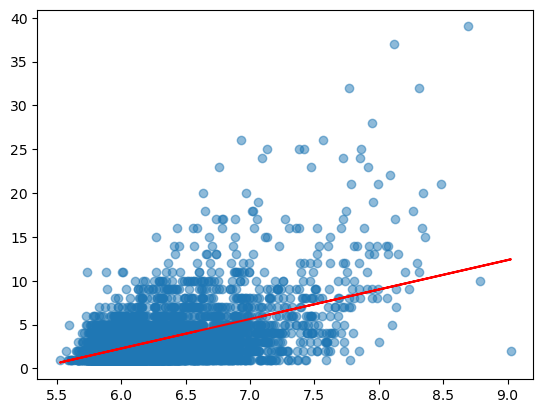

In [17]:
plt.scatter(magnitudes_opt, number_of_peaks_opt, alpha = 0.5)
# Fit a line of best fit
m, b = np.polyfit(magnitudes_opt, number_of_peaks_opt, 1)
plt.plot(magnitudes_opt, m * np.array(magnitudes_opt) + b, color='red')
#plt.scatter(magnitudes_moy, number_of_peaks_moy, alpha = 0.5)

Spearman correlation coefficient: 0.3846661031043126
P-value: 2.4954586299273435e-144


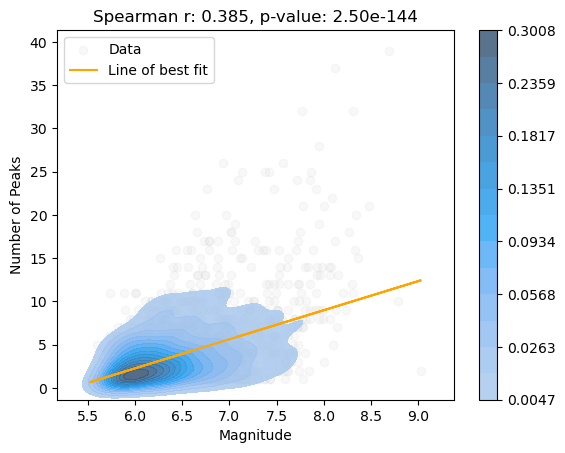

In [40]:
import seaborn as sns

plt.scatter(magnitudes_opt, number_of_peaks_opt, alpha = 0.15, color = 'lightgrey', label = 'Data')

# Create a DataFrame for the data
data = pd.DataFrame({
    'Magnitude': magnitudes_opt,
    'Number of Peaks': number_of_peaks_opt
})

# Plot the density plot with a colorbar
sns.kdeplot(data=data, x='Magnitude', y='Number of Peaks', fill=True, cbar=True, levels=15, alpha = 0.85)
#sns.kdeplot(data=data, x='Magnitude', y='Number of Peaks', fill=None, levels=15, linewidths=1)

# Calculate the Spearman correlation coefficient
spearman_corr, p_value = stats.spearmanr(magnitudes_opt, number_of_peaks_opt)

print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")


m, b = np.polyfit(magnitudes_opt, number_of_peaks_opt, 1)
plt.plot(magnitudes_opt, m * np.array(magnitudes_opt) + b, color='orange', label = 'Line of best fit')


plt.title(f'Spearman r: {spearman_corr:.3f}, p-value: {p_value:.2e}')
plt.legend()
plt.show()

Spearman correlation coefficient: 0.3846661031043126
P-value: 2.4954586299273435e-144
